In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Target'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)



In [2]:

data['Target'] = data['Target'].map({'M': 1, 'B': 0})

X = data.iloc[:, 2:]  
y = data['Target']    
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)


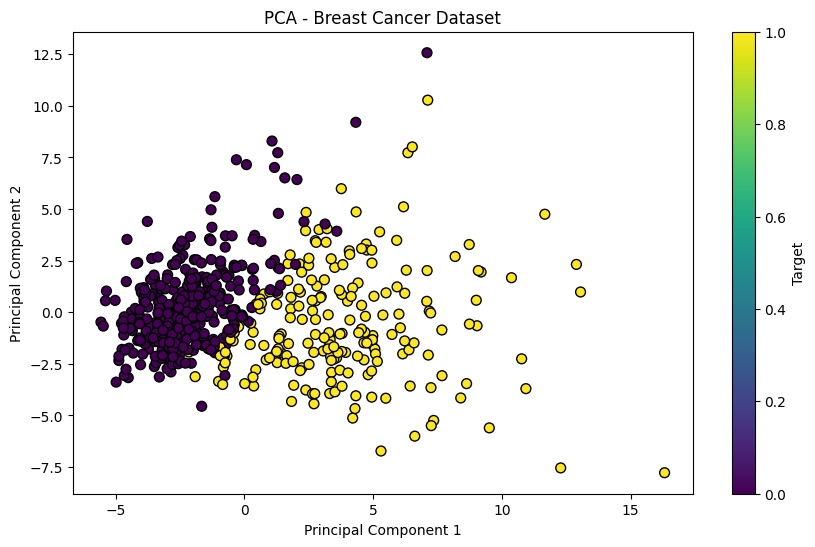

Składowe główne (macierz wektorów własnych):
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


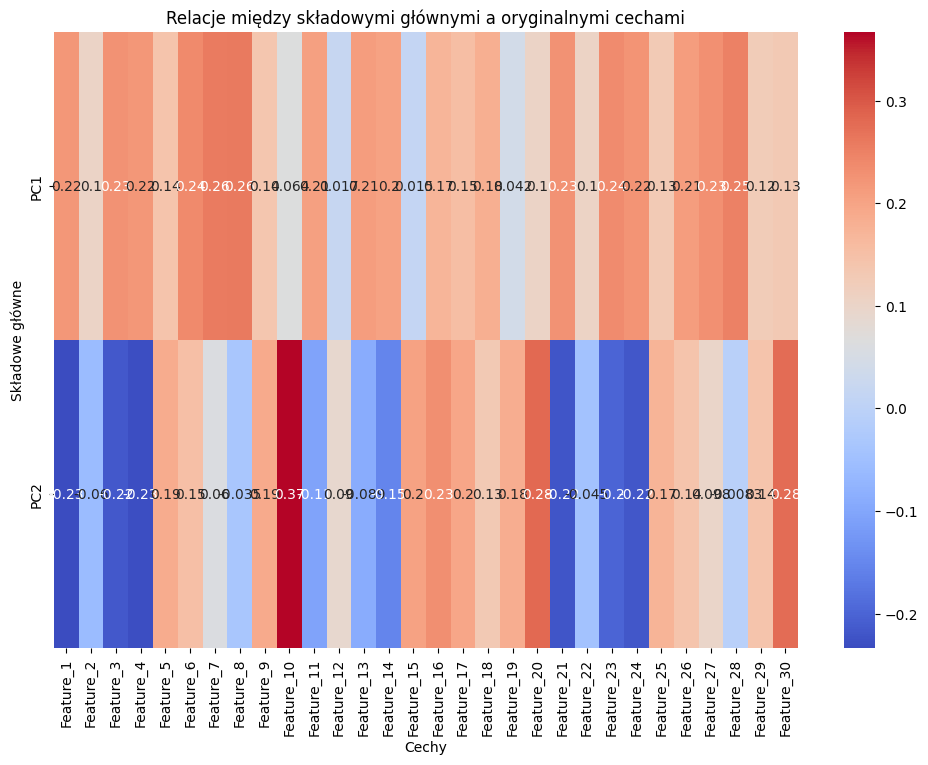

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA - Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Target")
plt.show()

print("Składowe główne (macierz wektorów własnych):")
print(pca.components_)

import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(pca.components_, cmap='coolwarm', annot=True, xticklabels=X.columns, yticklabels=['PC1', 'PC2'])
plt.title("Relacje między składowymi głównymi a oryginalnymi cechami")
plt.xlabel("Cechy")
plt.ylabel("Składowe główne")
plt.show()

Wariancja wyjaśniana przez PC1: 0.44
Wariancja wyjaśniana przez PC2: 0.19
Łączna wariancja wyjaśniana przez dwie składowe: 0.63


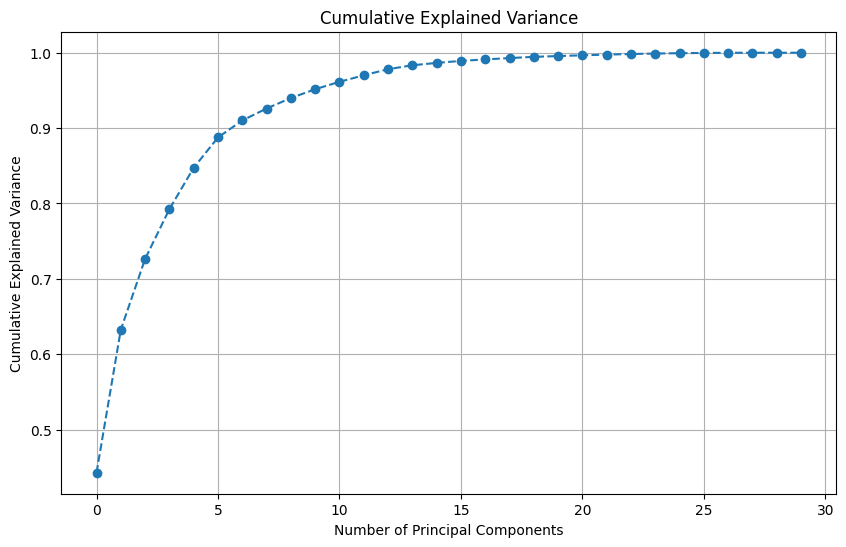

Liczba składowych potrzebnych do wyjaśnienia 95% wariancji: 10
Liczba składowych potrzebnych do wyjaśnienia 99% wariancji: 17


In [4]:

explained_variance = pca.explained_variance_ratio_
print(f"Wariancja wyjaśniana przez PC1: {explained_variance[0]:.2f}")
print(f"Wariancja wyjaśniana przez PC2: {explained_variance[1]:.2f}")
print(f"Łączna wariancja wyjaśniana przez dwie składowe: {explained_variance.sum():.2f}")

pca_full = PCA()
pca_full.fit(X_std)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
components_95 = np.argmax(cumulative_variance >= 0.95) + 1
components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"Liczba składowych potrzebnych do wyjaśnienia 95% wariancji: {components_95}")
print(f"Liczba składowych potrzebnych do wyjaśnienia 99% wariancji: {components_99}")

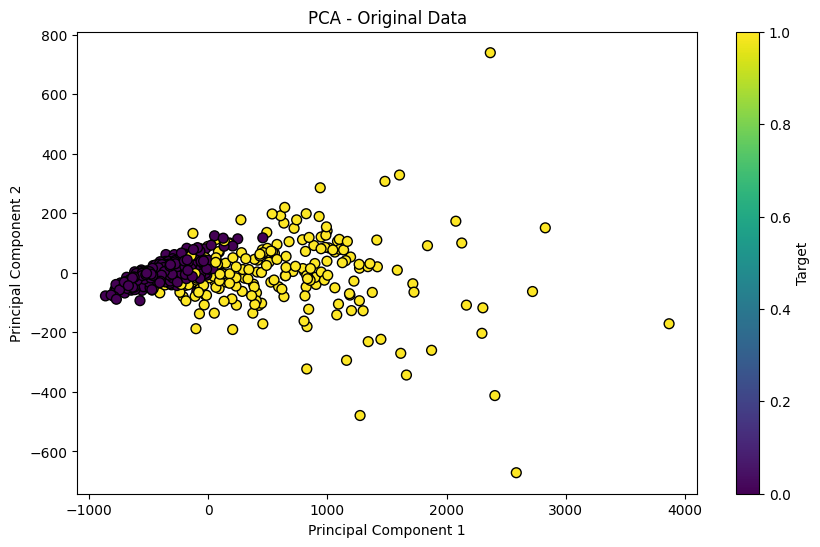

Składowe główne (macierz wektorów własnych):
[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e

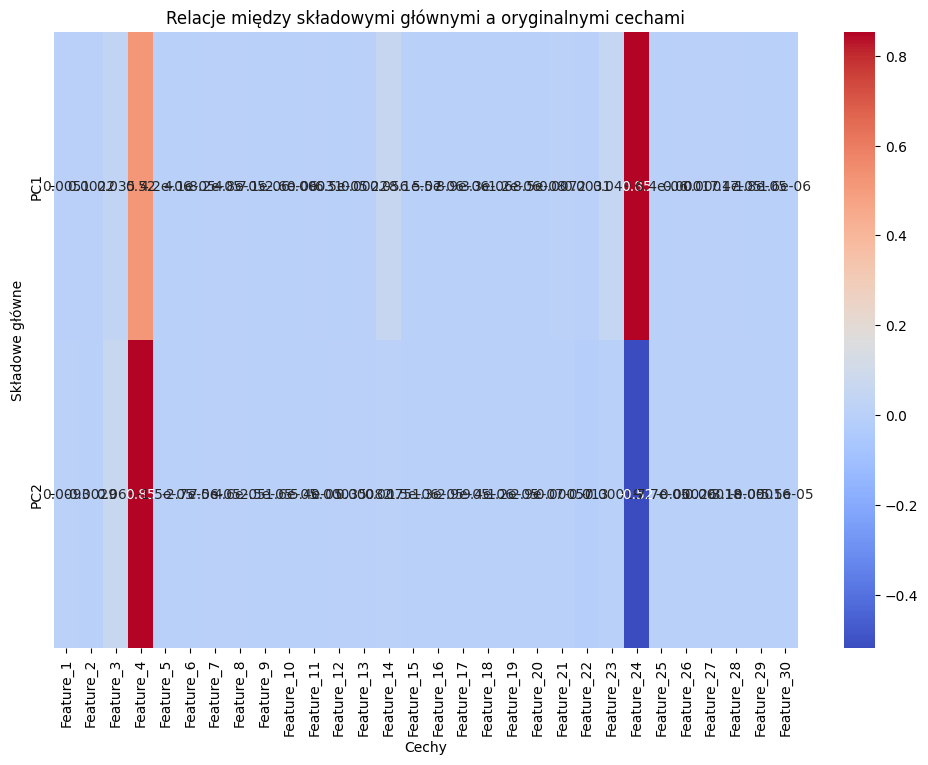

Wariancja wyjaśniana przez PC1: 0.98
Wariancja wyjaśniana przez PC2: 0.02
Łączna wariancja wyjaśniana przez dwie składowe: 1.00


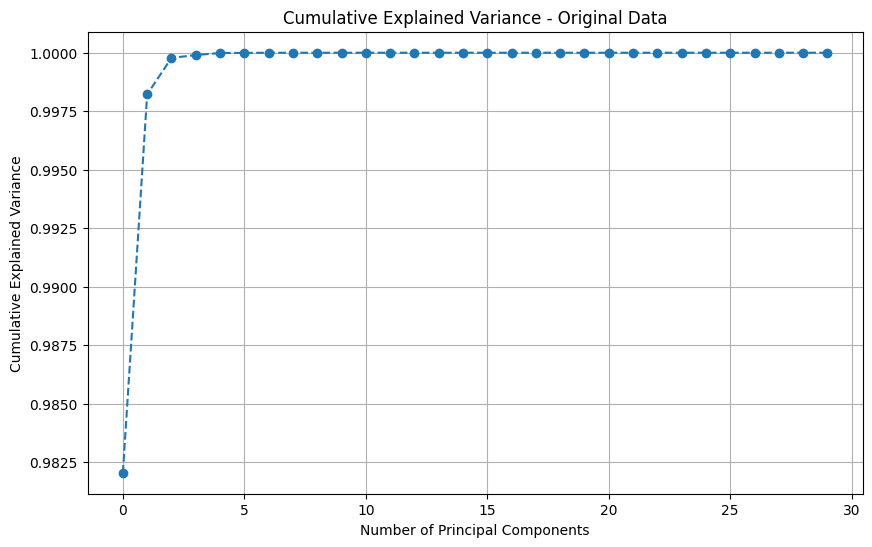

Liczba składowych potrzebnych do wyjaśnienia 95% wariancji: 1
Liczba składowych potrzebnych do wyjaśnienia 99% wariancji: 2


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Target'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

data['Target'] = data['Target'].map({'M': 1, 'B': 0})

X = data.iloc[:, 2:]
y = data['Target']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA - Original Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Target")
plt.show()

print("Składowe główne (macierz wektorów własnych):")
print(pca.components_)

import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(pca.components_, cmap='coolwarm', annot=True, xticklabels=X.columns, yticklabels=['PC1', 'PC2'])
plt.title("Relacje między składowymi głównymi a oryginalnymi cechami")
plt.xlabel("Cechy")
plt.ylabel("Składowe główne")
plt.show()

explained_variance = pca.explained_variance_ratio_
print(f"Wariancja wyjaśniana przez PC1: {explained_variance[0]:.2f}")
print(f"Wariancja wyjaśniana przez PC2: {explained_variance[1]:.2f}")
print(f"Łączna wariancja wyjaśniana przez dwie składowe: {explained_variance.sum():.2f}")

pca_full = PCA()
pca_full.fit(X)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.title("Cumulative Explained Variance - Original Data")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
components_95 = np.argmax(cumulative_variance >= 0.95) + 1
components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"Liczba składowych potrzebnych do wyjaśnienia 95% wariancji: {components_95}")
print(f"Liczba składowych potrzebnych do wyjaśnienia 99% wariancji: {components_99}")
